En este notebook, se utiliza el conjunto de datos MNIST y se aplican transformaciones con aumento de datos a las imágenes. Las transformaciones incluyen volteo horizontal aleatorio, rotación aleatoria de hasta 10 grados y recorte aleatorio de 28x28 píxeles con relleno de 4 píxeles. Además, se convierten las imágenes en tensores y se normalizan los valores del canal único.

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms


In [2]:
# Transformaciones de datos con aumento
transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),  # Volteo horizontal aleatorio
    transforms.RandomRotation(10),  # Rotación aleatoria de hasta 10 grados
    transforms.RandomCrop(28, padding=4),  # Recorte aleatorio de 28x28 con relleno de 4 píxeles
    transforms.ToTensor(),  # Convierte la imagen a tensor
    transforms.Normalize((0.5,), (0.5,))  # Normaliza los valores del canal único
])

In [3]:
# Descarga y carga del conjunto de datos MNIST
trainset = torchvision.datasets.MNIST(root='./data', train=True,
                                      download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64,
                                          shuffle=True)


100%|██████████| 9912422/9912422 [00:28<00:00, 349174.61it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 701930.72it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:02<00:00, 648618.43it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 6533103.14it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [4]:
# Mostrar imágenes de ejemplo
import matplotlib.pyplot as plt
import numpy as np

def imshow(img):
    img = img / 2 + 0.5     # Desnormalizar
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)), cmap='gray')
    plt.axis('off')
    plt.show()

El bucle for se utiliza para iterar sobre los datos de entrenamiento y mostrar un lote de imágenes aumentadas con sus etiquetas correspondientes. El break se utiliza para detener el bucle después de mostrar un lote de imágenes.

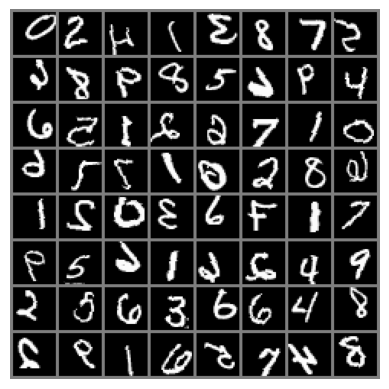

In [5]:
# Iterar sobre los datos de entrenamiento
for images, labels in trainloader:

    # Mostrar imágenes y etiquetas
    imshow(torchvision.utils.make_grid(images))
    break  # Detener después de mostrar un lote de imágenes

Ejercicio: Aumento de datos con transformaciones en PyTorch

    1. Descarga un conjunto de datos de imágenes para clasificación, como CIFAR-10

    2- Crea una clase personalizada llamada MiConjuntoDeDatos que herede de torch.utils.data.Dataset. Esta clase debe cargar los datos del conjunto de datos descargado y realizar transformaciones de aumento de datos.

    3. Implementa las siguientes transformaciones como métodos de la clase MiConjuntoDeDatos:
        __init__(): Carga y almacena los datos del conjunto de datos descargado.
        __len__(): Devuelve la longitud del conjunto de datos.
        __getitem__(): Obtiene un elemento del conjunto de datos en un índice dado. Aplica transformaciones de aumento de datos a la imagen y devuelve la imagen transformada y su etiqueta correspondiente.

    4. Crea una instancia de MiConjuntoDeDatos utilizando el conjunto de datos descargado.

    5. Utiliza la clase torchvision.transforms para aplicar transformaciones adicionales a las imágenes, como rotación, volteo horizontal, recorte aleatorio, etc. Experimenta con diferentes transformaciones y parámetros para generar variedad en los datos.

    Muestra algunas imágenes antes y después de las transformaciones para visualizar el efecto del aumento de datos.

Pista: Puedes utilizar la biblioteca matplotlib para visualizar las imágenes.

Files already downloaded and verified


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

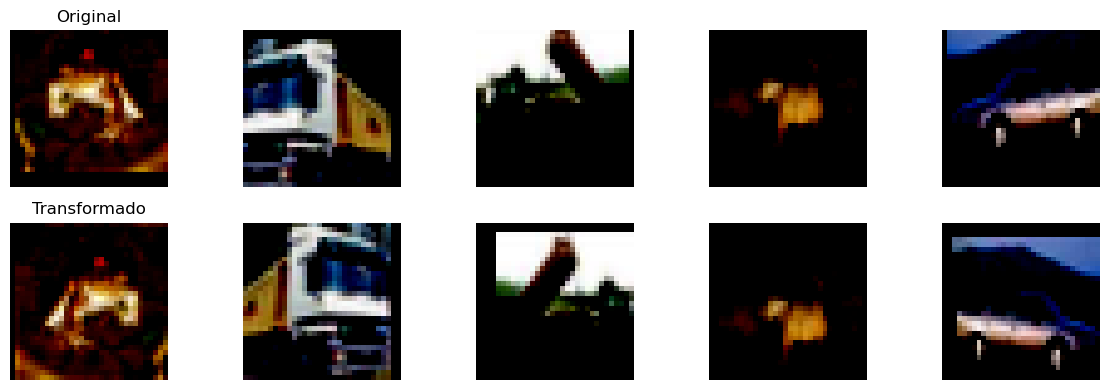

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# Paso 1: Descargar el conjunto de datos CIFAR-10
transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomCrop(32, padding=4),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)

# Paso 2: Crear una clase personalizada para el conjunto de datos CIFAR-10
class MiConjuntoDeDatosCIFAR10(torch.utils.data.Dataset):
    def __init__(self, dataset):
        self.dataset = dataset

    def __len__(self):
        return len(self.dataset)

    def __getitem__(self, idx):
        image, label = self.dataset[idx]
        return image, label

# Paso 3: Crear una instancia del conjunto de datos personalizado
mi_conjunto_de_datos = MiConjuntoDeDatosCIFAR10(train_dataset)

# Paso 4: Mostrar algunas imágenes antes y después de las transformaciones
num_images = 5

# Obtener imágenes originales
original_images = [train_dataset[i][0] for i in range(num_images)]

# Crear una figura para mostrar las imágenes
fig, axes = plt.subplots(nrows=2, ncols=num_images, figsize=(12, 4))

# Mostrar imágenes originales
for i, image in enumerate(original_images):
    axes[0, i].imshow(image.permute(1, 2, 0))
    axes[0, i].axis('off')

# Obtener imágenes transformadas
transformed_images = [mi_conjunto_de_datos[i][0] for i in range(num_images)]

# Mostrar imágenes transformadas
for i, image in enumerate(transformed_images):
    axes[1, i].imshow(image.permute(1, 2, 0))
    axes[1, i].axis('off')

# Configurar títulos
axes[0, 0].set_title('Original')
axes[1, 0].set_title('Transformado')

# Ajustar el espaciado entre las subfiguras
plt.tight_layout()

# Mostrar la figura
plt.show()
